## We are a team of 3 members, we have an excuse from Eng. Doaa Ghaleb for that
### Names & IDs:
#### Malak Moustafa Abdel Maboud Salem&nbsp;&nbsp;&nbsp;&nbsp;20237015
#### Laila Mohamed Shawky Salama&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;20236076
#### Jumanah Muhammad Ali Rushdi&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;20237003

## 1. Data Loading and Initial Exploration

In [96]:
# Core data handling and numerical computation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling datetime
from datetime import datetime 
# For clustering
from sklearn.cluster import KMeans

In [97]:
# Load the dataset, we also need to handle the \t thing as it will mess up with everything
df = pd.read_csv('Uber Request Data.csv',  sep='\t')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [98]:
# Display first few rows
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [99]:
# Display last 5 rows
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [100]:
# let's take a look at what we have, starting with the size of the dataset
df.shape

(6745, 6)

In [101]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [102]:
# Statistical summary for the numerical only
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [103]:
# Statistical summary including the numerical and catogorical columns
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 17:57,12/7/2016 21:53
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [104]:
# Now let's check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [105]:
# to check on the duplicate values, get the number of unique values
print("Count of unique values per column:")
df.nunique()

Count of unique values per column:


Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

For the initial data visualization

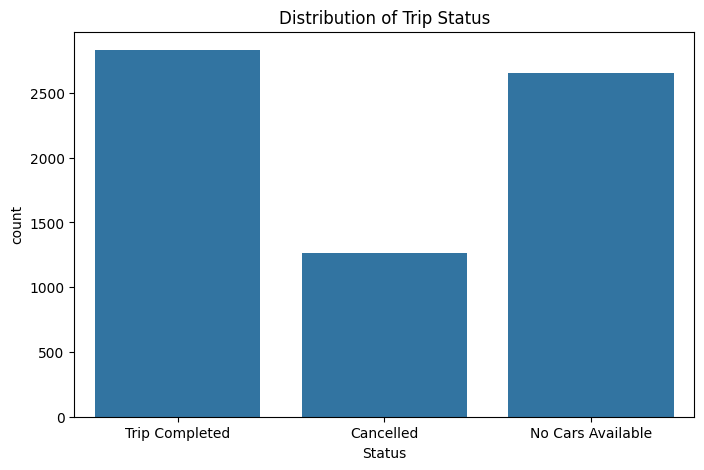

In [106]:
# Plot the status of trips
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Trip Status')
plt.show()

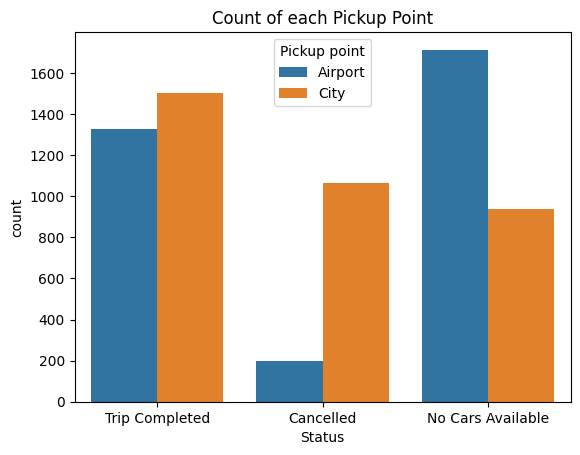

In [107]:
sns.countplot(x="Status", hue="Pickup point", data=df)
plt.title("Count of each Pickup Point")
plt.show()

## 2. Data Preprocessing (include handling the missing data in the dataset)

In [108]:
from dateutil import parser
def smart_date_parser(date_str):
    try:
        return parser.parse(str(date_str), dayfirst=True)
    except:
        return pd.NaT
df['Request timestamp'] = df['Request timestamp'].apply(smart_date_parser)
df['Drop timestamp'] = df['Drop timestamp'].apply(smart_date_parser)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [109]:
# Delete Duplicates
df.drop_duplicates(inplace=True)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [110]:
# Now let's check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


#Handling missing data
- we will keep Drop_timestamp as it is because it will be helpful in analyzing
as when we delete we will lose half of the data
- we will substitute missing driver ids with 0

In [111]:
# Substituting missing driver ids with 0
df['Driver id'] = df['Driver id'].fillna(0)
df['Driver id'] = df['Driver id'].astype('Int64')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [112]:
# Cleaning text values (like Status and Pickup point)
df['Status'] = df['Status'].str.strip().str.title()
df['Pickup point'] = df['Pickup point'].str.strip().str.title()
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [113]:
# Checking for Unexpected Values in Numeric Columns
df = df[df['Request id'] > 0]
df = df[df['Driver id'] >= 0]

### 3. Feature Engineering (extract additional features such ad Hour of day , day of week ,…etc from “Date/Time column)


In [114]:
# Extracting Time Features
df['Request hour'] = df['Request timestamp'].dt.hour         
df['Request day'] = df['Request timestamp'].dt.dayofweek 

df['Request hour'] = df['Request hour'].astype('Int64')
df['Request day'] = df['Request day'].astype('Int64')

weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['Request day'] = df['Request day'].map(weekday_map)
df

# They are all workdays no weekends(Sat, Sun)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday
...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT,23,Friday
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT,23,Friday
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT,23,Friday
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT,23,Friday


In [115]:
# Creating a "Time Period" Column
def get_time_period(hour):
    if pd.isna(hour):
        return None
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time slot'] = df['Request hour'].apply(get_time_period)

In [116]:
# Display the Extracted Time Features
cols_to_show = ['Request timestamp', 'Request hour', 'Request day',  
                'Time slot']

existing_cols = [col for col in cols_to_show if col in df.columns]
print(df[existing_cols].head())

    Request timestamp  Request hour Request day Time slot
0 2016-07-11 11:51:00            11      Monday   Morning
1 2016-07-11 17:57:00            17      Monday   Evening
2 2016-07-12 09:17:00             9     Tuesday   Morning
3 2016-07-12 21:08:00            21     Tuesday     Night
4 2016-07-13 08:33:16             8   Wednesday   Morning


In [117]:
# Convert Some Columns to Categorical Variables
df['Time slot'] = df['Time slot'].astype('category')
df['Time slot']

0       Morning
1       Evening
2       Morning
3         Night
4       Morning
         ...   
6740      Night
6741      Night
6742      Night
6743      Night
6744      Night
Name: Time slot, Length: 6745, dtype: category
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

In [118]:
df['Trip duration'] = df['Drop timestamp'] - df['Request timestamp']
df['Trip duration'] = df['Trip duration'].apply(
    lambda x: str(x).replace("0 days ", "") if pd.notna(x) else "00:00:00"
)
df['Is Completed'] = df['Status'] == 'Trip Completed'
df['Driver Available'] = df['Driver id'].apply(lambda x: True if pd.notna(x) and x > 0 else False)
df['Request Date'] = df['Request timestamp'].dt.date
df['DurationMins'] = df['Trip duration'].apply(lambda x: pd.Timedelta(x).total_seconds() / 60 if pd.notna(x) else 0)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Time slot,Trip duration,Is Completed,Driver Available,Request Date,DurationMins
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,Morning,01:09:00,True,True,2016-07-11,69.000000
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,Evening,00:50:00,True,True,2016-07-11,50.000000
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,Morning,00:41:00,True,True,2016-07-12,41.000000
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,Night,00:55:00,True,True,2016-07-12,55.000000
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,Morning,00:52:31,True,True,2016-07-13,52.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT,23,Friday,Night,00:00:00,False,False,2016-07-15,0.000000
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT,23,Friday,Night,00:00:00,False,False,2016-07-15,0.000000
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT,23,Friday,Night,00:00:00,False,False,2016-07-15,0.000000
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT,23,Friday,Night,00:00:00,False,False,2016-07-15,0.000000


In [119]:
# Save the Modified Dataset
df.to_csv("Uber with features.csv", index=False)

dataset after preprocessing

In [120]:
df.head(3)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Time slot,Trip duration,Is Completed,Driver Available,Request Date,DurationMins
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,Morning,01:09:00,True,True,2016-07-11,69.0
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,Evening,00:50:00,True,True,2016-07-11,50.0
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,Morning,00:41:00,True,True,2016-07-12,41.0


### identify hot spots of Uber activity , outliers , get extra insights

Visualization for the hourly requests distribution per day

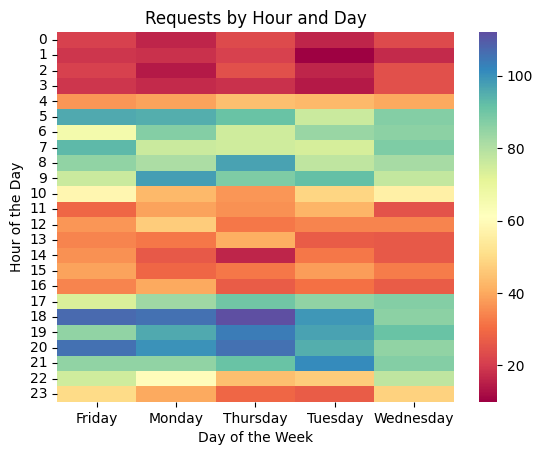

In [121]:
ReqByHour = df.pivot_table(values='Request id', index='Request hour', columns='Request day', aggfunc='count')
# pivot table is used to create a matrix of values, which is then used to create a heatmap
# the values used are the request ids which are counted for each hour and day
sns.heatmap(ReqByHour, cmap='Spectral')
plt.title('Requests by Hour and Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

Visualization for the amount of daily requests per week

<Axes: xlabel='Request day', ylabel='count'>

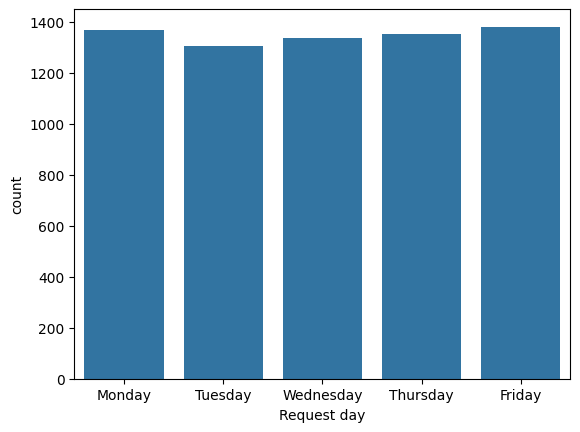

In [122]:
sns.countplot(x='Request day', data=df)

Box plot representation for trip durations 

First: using boxplots:

C:\Users\DELL\AppData\Local\Temp\ipykernel_12792\3815196468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Request hour', y='DurationMins', data=MinsAboveZero, palette='rainbow')


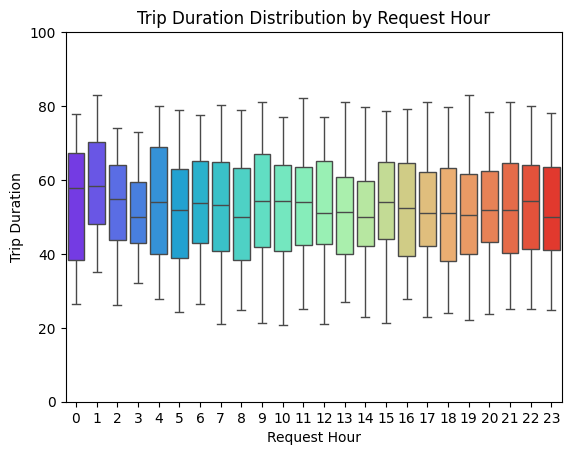

In [123]:
MinsAboveZero=df[df['DurationMins'] > 0]
#Trip durations with zero values are excluded
sns.boxplot(x='Request hour', y='DurationMins', data=MinsAboveZero, palette='rainbow')
plt.title('Trip Duration Distribution by Request Hour')
plt.xlabel('Request Hour')
plt.ylabel('Trip Duration')
plt.ylim(0,100)
plt.show()

Second: using a scatter plot

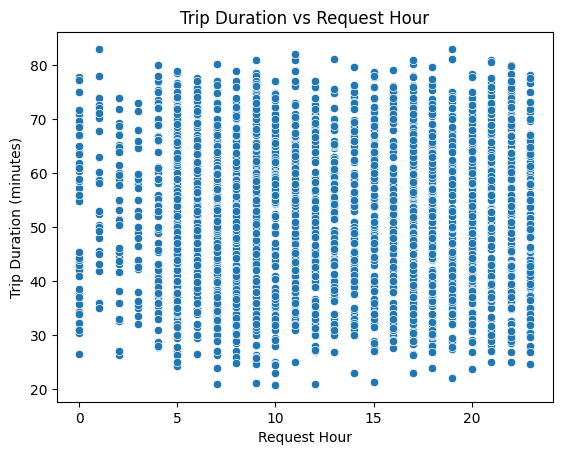

In [124]:
sns.scatterplot(x='Request hour', y='DurationMins', data=MinsAboveZero)
plt.xlabel('Request Hour')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs Request Hour')
plt.show()

Top 10 drivers which have the highest number of trips

C:\Users\DELL\AppData\Local\Temp\ipykernel_12792\3148164015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(driver_trips.head(10), palette='viridis')


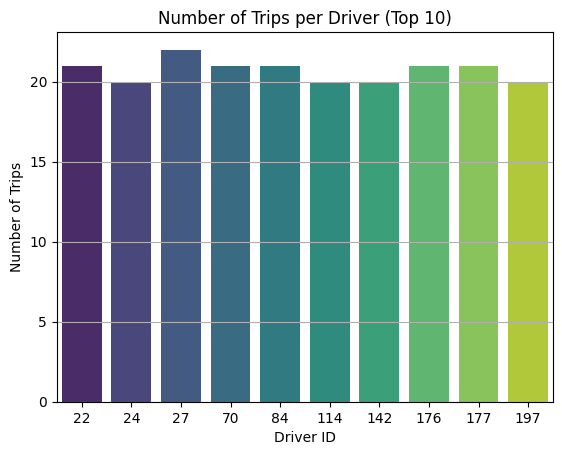

In [125]:
NonzeroID=df[df['Driver id'] > 0]
driver_trips = NonzeroID.groupby('Driver id').size().sort_values(ascending=False)
plt.grid(True)
sns.barplot(driver_trips.head(10), palette='viridis')
plt.title('Number of Trips per Driver (Top 10)')
plt.xlabel('Driver ID')
plt.ylabel('Number of Trips')
plt.show()

Number of rides per time slot (Afternoon, Evening, Morning, Night)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12792\2657867080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Time slot', data=df, palette='crest')


<Axes: xlabel='Time slot', ylabel='count'>

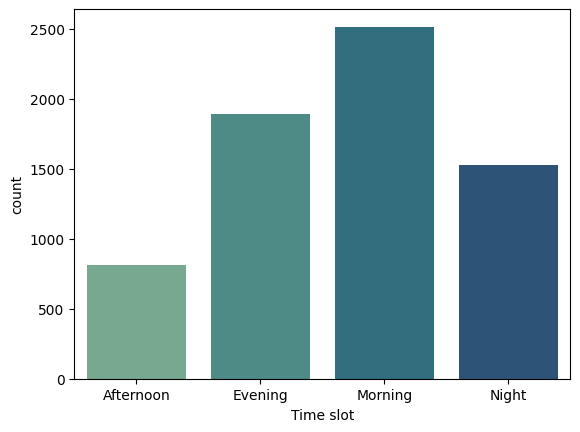

In [126]:
sns.countplot(x='Time slot', data=df, palette='crest')

From the barplot it appears that rides are the most in the morning time, which is the peak time for rides

C:\Users\DELL\AppData\Local\Temp\ipykernel_12792\4095978505.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Request hour', data=df, palette='crest')


<Axes: xlabel='Request hour', ylabel='count'>

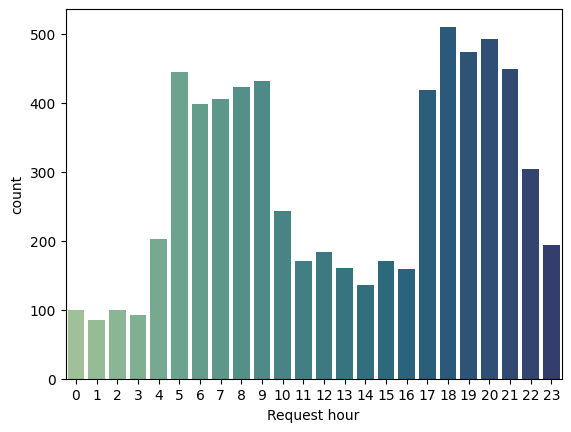

In [127]:
sns.countplot(x='Request hour', data=df, palette='crest')

In [128]:
# Uber cars are requested the most at 6 PM

Requests for Uber cars in these places (generally)

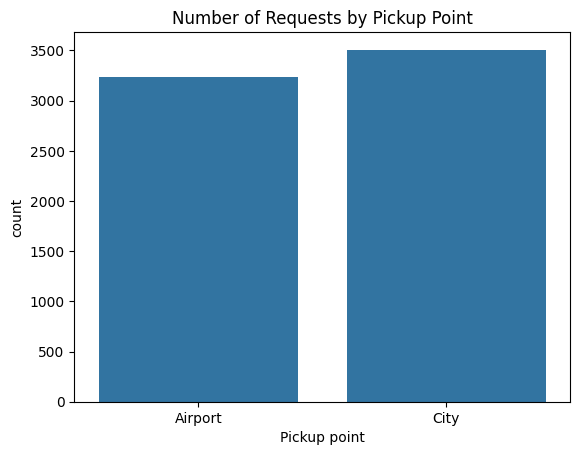

In [129]:
sns.countplot(x='Pickup point', data=df)
plt.title('Number of Requests by Pickup Point')
plt.show()

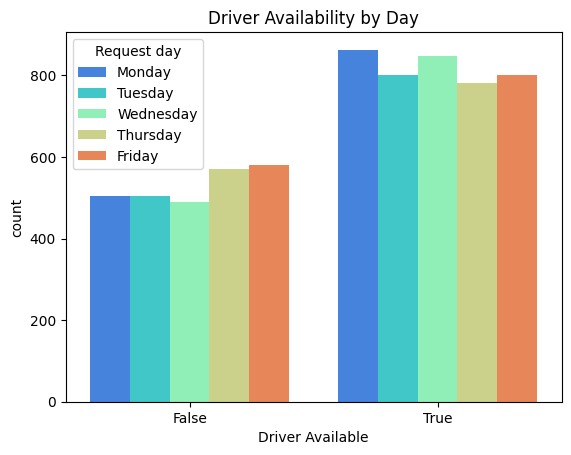

In [130]:
sns.countplot(x='Driver Available', hue='Request day', data=df, palette='rainbow')
plt.title('Driver Availability by Day')
plt.show()

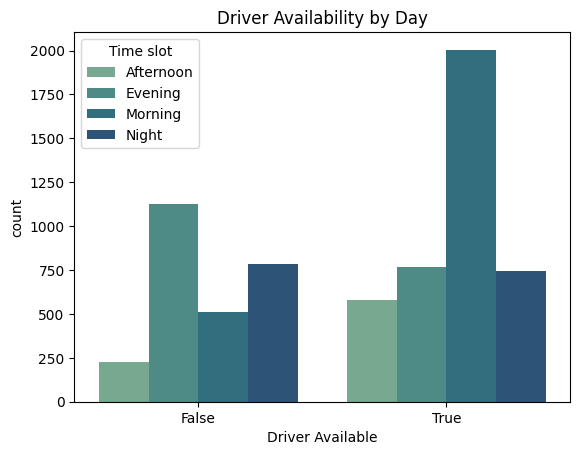

In [131]:
sns.countplot(x='Driver Available', hue='Time slot', data=df, palette='crest')
plt.title('Driver Availability by Day')
plt.show()

In [132]:
# Drivers seem to be more available in the Evening

In [133]:
N = len(df) # Number of rows in the dataframe
latitudes = np.random.uniform(-10,10,size=N)
longitudes = np.random.uniform(-20,20,size=N)
# random location coordinates are generated using a specific range (like NYC for example)
df['Latitude'] = latitudes
df['Longitude'] = longitudes
X = df[['Longitude', 'Latitude']] # X is the feature for clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
# A new column 'cluster' is created with the location of the cluster for each point
print(df[['Longitude', 'Latitude', 'cluster']].head()) #check the first few rows


   Longitude  Latitude  cluster
0  -3.209663  6.554764        4
1   7.809377  9.140106        3
2 -17.043976  3.912830        4
3  18.530398 -1.433731        0
4   1.518647 -3.332770        2


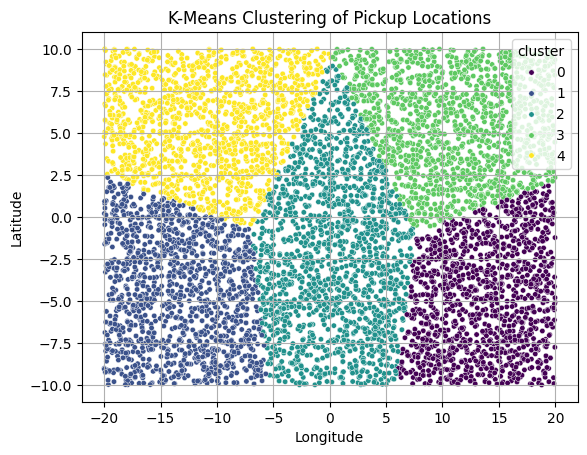

In [134]:
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', data=df, palette='viridis', s=15)
plt.title('K-Means Clustering of Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Report of Uber Dataset Analysis:

First => Dataset Overview:-
      Dataset name: Uber Request Data.
      Columns involved: Request id	Pickup point	Driver id	Status	Request timestamp	Drop timestamp.
      Records: About 6745 rows.
      Initial steps: We loaded the libraries needed then loaded the data using pandas with tab separator (\t) and explored it.

Second => Data Exploration Findings:
      Some columns contain missing values like Drop timestamp and Driver id, and they need to be handled.
      First figure interpretation: Most requests are from City, fewer from Airport.
      Second figure interpretation: Significant number of trips are Cancelled or No Cars Available which is a huge opportunity cost.
      
Third => Preprocessing:
      We retaind the Drop timestamp column, since it's important for our analysis using a defined function we did ourselves.
      We fixed the null values by filling, not deleting, them. Because it represents a huge proportion of our data so we can't just drop it.
      We cleaned Catogorical data like 'Status' & 'Pickup point' by capitalizing words properly and removing unnecessary leading and trailing spaces
      We extracted a few usefull Time Features like: 'request hour', 'request day', and 'Trip duration'.
      We Created a "Time Period" Column, ranging from 0 to 23.
      We added, extracted, other few coloumns like: "DurationMins" that displayes the duration in mintues format, "Request Date", "Driver Available" that Checks if a driver is assigned and available, return false if there is missing driver or invalid ID, and "Is Completed" that checks if the trip finished successfully.
      We updated the dataset after we finished preprocessing phase.

Fourth => Insights about the graphs:
      The busiest hours appear to be:
           Evening: Around 5 PM to 8 PM (17:00 to 20:00), especially on weekdays. 
           These hours likely reflect the times users head home from work.
           Requests drop significantly between 2 AM and 5 AM. This is expected as most people are asleep.
      
      There are two major demand peaks: one in the morning (5-10 AM) and a larger one in the evening (17-21 PM/5-9 PM). The highest demand occurs at 19:00 (7 PM), with over 500 ride requests. The lowest demant is at 12 am to 3 am.

      Early morning rides (12AM, 4AM) appear slightly longer than midday rides, but the difference isn't that big.

      Monday through Friday show high activity, particularly during evening hours.

      Thursday and Friday evenings seem to have higher than usual requests, possibly due to:
           People going out or traveling during the end of the week.

      Trips generally take between 45-60 minutes on average.

      All top 10 out-performing drivers has completed between 20-22 trips, there are 4 of them who roughly made it to 20 trips and the rest exceeded that.As we can see from the previous statement, that the distribution is very tight, there isn't that must of difference betwwen our top-10 drivers. The most performing driver's ID is 27.

      Most request are from the City, as a pick-up point.

      Monday has The most active, available drivers, around 800, meanwhile Friday has the highest in-active drivers. When it come the timeslot, most drivers, ariund 2500, are available in the morning and on the other hand most inactive timeslot for drivers is Evening around 1000 inavailable drivers.

      Let's take newyork, for example, Instead of thinking about the entire city as one market, think of it as 5 smaller markets based on the pickup points.
      Lowest Demand: in the southeast, purple cluster, appears to have slightly less density compared to others.
      Highest Demand: the teal cluter, in the centre of the city, appears to have the highest concentration of pickup points.

Fifth => Suggestions:
    (1) Driver Shortage During Peak Demand (Evenings)
        Problem: While evening hours (5–9 PM) see the highest ride demand, there is a noticeable drop in driver availability (~1000 inactive drivers).
        Solution: Offer financial incentives, bonses for drivers active between 5 PM – 9 PM. Send notifications to tell drivers about expected spikes in demand. Encourage riders to schedule rides during peaks to improve load balancing.

    (2) Underutilized Time Slots (Early Morning)
        Problem: Very low demand between 12–3 AM, but trip durations tend to be slightly longer. 
        Solution: Offer promo codes or offers for night passengers to increase them by that time. Educate users on Uber’s safety measures to increase their confidence in traveling at night.

    (3) Uneven Driver Engagement Across the Week
        Problem: Monday has the most active drivers (~800), while Friday, despite being a high-demand day, has the most inactive drivers.
        Solution: Ask drivers why Friday engagement is low — it could be fatigue, religious reasons, or lack of incentives. Offer higher bonuses or priority trips for drivers working Thursday/Friday evenings or Introduce streaks that reward them for working multiple days in a row.

    (4) Segmenting NYC into 5 operational markets based on pickup demand clusters
        Problem: Inefficient resource distribution
        Solution: Offer driver bonuses or rider discounts to stimulate activity in the southeast of the city.
    
    (5) Cars Availability & Ride Cancelation:
        Problem: No cars available mostly at the airport, and most rides get canceled at the city.
        Solution: About the airport, Use flight arrival info to send more drivers when planes land and Work with airports to provide easy pickup spots for Uber drivers. For the City, do user-surveys to get to identify the issue, Let riders switch drivers if the first one is delayed.